In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
### Reading Dataset
partmat = pd.read_csv('C:/Users/rayad/Downloads/Delhi (1).xlsx - Delhi.csv')

In [3]:
partmat.head()

,#Data,Unnamed: 1,Unnamed: 2
0,#Attribution: IMD - India Meteorological Depar...,NaN,NaN
1,date,pm25,NaN
2,4/20/18 0:00,92,hjhh
3,4/19/18 23:00,89,NaN
4,4/19/18 22:00,75,NaN


In [4]:
### Slicing data to remove first row and 3rd column from dataframe
partmat = (partmat.iloc[1:2376, :2])
partmat.head()

,#Data,Unnamed: 1
1,date,pm25
2,4/20/18 0:00,92
3,4/19/18 23:00,89
4,4/19/18 22:00,75
5,4/19/18 21:00,57


In [5]:
### Setting Header
header = partmat.iloc[0]
partmat = partmat[1:]
partmat.columns = header

In [6]:
### Converting date column to datetime format
partmat['date'] = pd.to_datetime(partmat['date'])

In [7]:
### Converting pm25 column to numeric from Object(string) datatype.
partmat['pm25'] = pd.to_numeric(partmat['pm25'], errors= 'coerce')

In [8]:
### Creating data column as index.
partmat = partmat.set_index('date')

In [9]:
partmat.head()

1,pm25
date,
2018-04-20 00:00:00,92.0
2018-04-19 23:00:00,89.0
2018-04-19 22:00:00,75.0
2018-04-19 21:00:00,57.0
2018-04-19 20:00:00,57.0


In [10]:
partmat.isnull().sum()

1
pm25    80
dtype: int64

In [11]:
## Sorting Index column in ascending order
pm = partmat.sort_index(ascending=True)

In [12]:
pm.head()

1,pm25
date,
2018-01-01 00:00:00,423.0
2018-01-01 01:00:00,414.0
2018-01-01 02:00:00,417.0
2018-01-01 03:00:00,466.0
2018-01-01 04:00:00,470.0


In [13]:
### There are some missing dates in the dataset, below to upsample the same.
all_days = pd.date_range(pm.index.min(), pm.index.max(), freq='H')
pm2 = pm.reindex(all_days)

In [14]:
### Adding Month, Day and Hour column to dataframe
pm2['Month'] = pm2.index.month
pm2['Hour'] = pm2.index.hour
pm2['Day'] = pm2.index.day

In [15]:
pm2.head()

1,pm25,Month,Hour,Day
2018-01-01 00:00:00,423.0,1,0,1
2018-01-01 01:00:00,414.0,1,1,1
2018-01-01 02:00:00,417.0,1,2,1
2018-01-01 03:00:00,466.0,1,3,1
2018-01-01 04:00:00,470.0,1,4,1


In [16]:
pm2.tail()

1,pm25,Month,Hour,Day
2018-04-19 20:00:00,57.0,4,20,19
2018-04-19 21:00:00,57.0,4,21,19
2018-04-19 22:00:00,75.0,4,22,19
2018-04-19 23:00:00,89.0,4,23,19
2018-04-20 00:00:00,92.0,4,0,20


In [17]:
### Separating the data month wise for further EDA Process
pm_jan = pm2[(pm2.Month == 1)]
pm_feb = pm2[(pm2.Month == 2)]
pm_mar = pm2[(pm2.Month == 3)]
pm_apr = pm2[(pm2.Month == 4)]

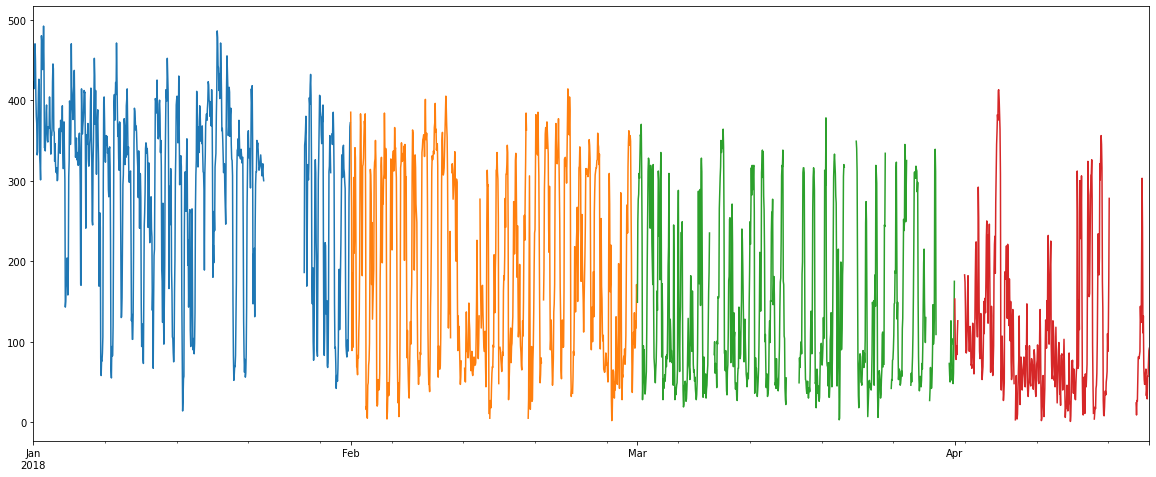

In [18]:
plt.figure(figsize=(20,8))
pm_jan['pm25'].plot()
pm_feb['pm25'].plot()
pm_mar['pm25'].plot()
pm_apr['pm25'].plot()

In [19]:

print('January ', pm_jan['pm25'].isnull().sum())
print('February ',pm_feb['pm25'].isnull().sum())
print('March ',pm_mar['pm25'].isnull().sum())
print('April ',pm_apr['pm25'].isnull().sum())

January  96
February  20
March  127
April  80


In [20]:
### Performing month wise hourly mean imputation

In [21]:
pm_jan = pm_jan.fillna(pm_jan.groupby(pm_jan.index.hour).transform('mean'))

In [22]:
pm_feb = pm_feb.fillna(pm_feb.groupby(pm_feb.index.hour).transform('mean'))

In [23]:
pm_mar = pm_mar.fillna(pm_mar.groupby(pm_mar.index.hour).transform('mean'))

In [24]:
pm_apr = pm_apr.fillna(pm_apr.groupby(pm_apr.index.hour).transform('mean'))

In [25]:
print(pm_jan['pm25'].isnull().sum())
print(pm_feb['pm25'].isnull().sum())
print(pm_mar['pm25'].isnull().sum())
print(pm_apr['pm25'].isnull().sum())

0
0
0
0


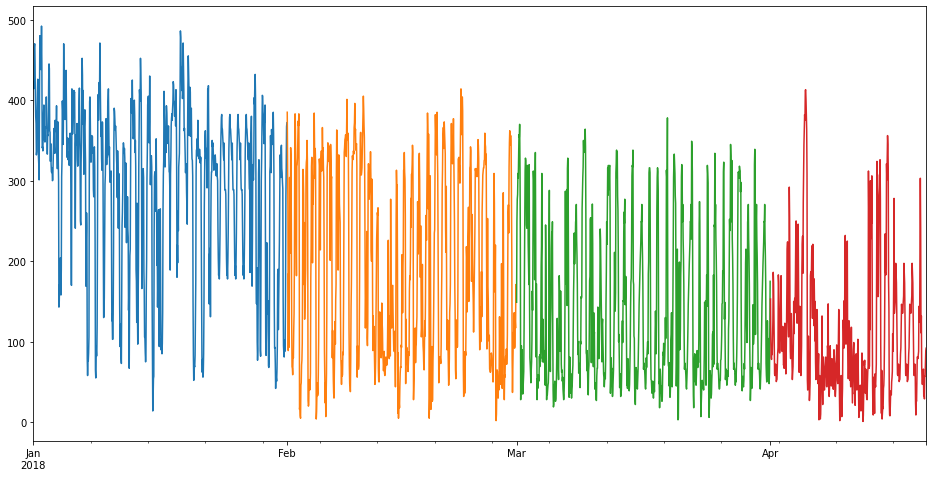

In [26]:
plt.figure(figsize=(16,8))
pm_jan.pm25.plot()
pm_feb.pm25.plot()
pm_mar.pm25.plot()
pm_apr.pm25.plot()

In [27]:
pm_jan = pm_jan.reset_index()
pm_feb = pm_feb.reset_index()
pm_mar = pm_mar.reset_index()
pm_apr = pm_apr.reset_index()

### Day/Hour wise Heat Maps

Text(0.5, 1.0, 'Heat Map Visualizatio for Jan Month')

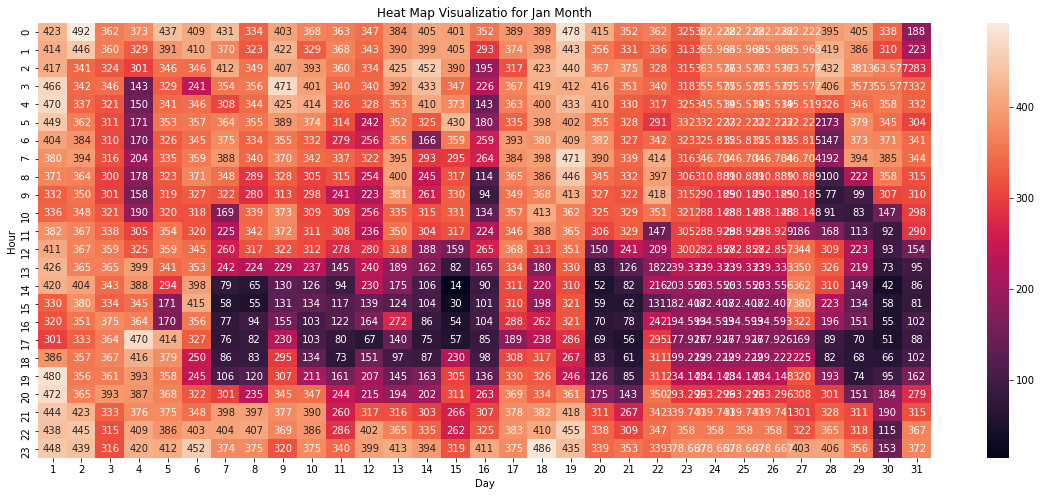

In [29]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=pm_jan,values="pm25",index="Hour",columns="Day",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.title('Heat Map Visualizatio for Jan Month')

Text(0.5, 1.0, 'Heat Map Visualizatio for Feb Month')

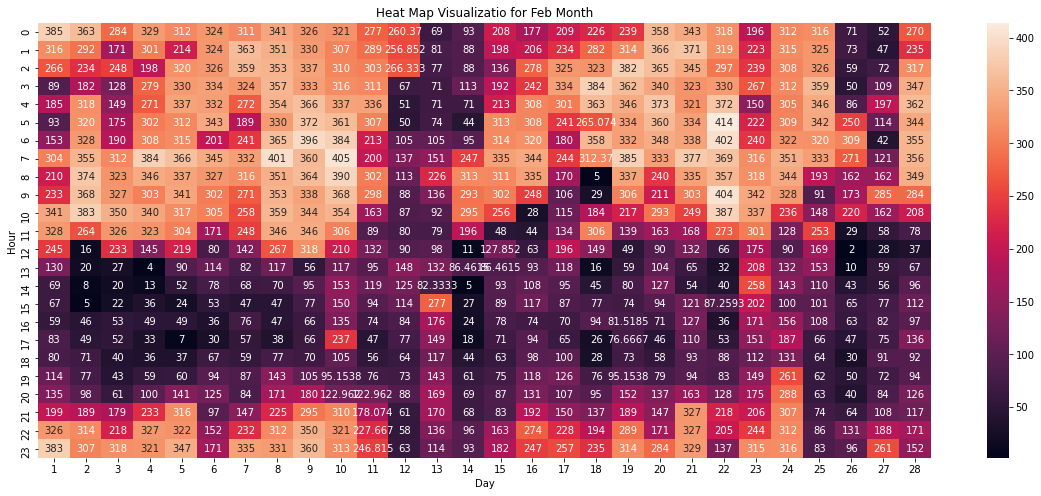

In [30]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=pm_feb,values="pm25",index="Hour",columns="Day",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.title('Heat Map Visualizatio for Feb Month')

Text(0.5, 1.0, 'Heat Map Visualizatio for Mar Month')

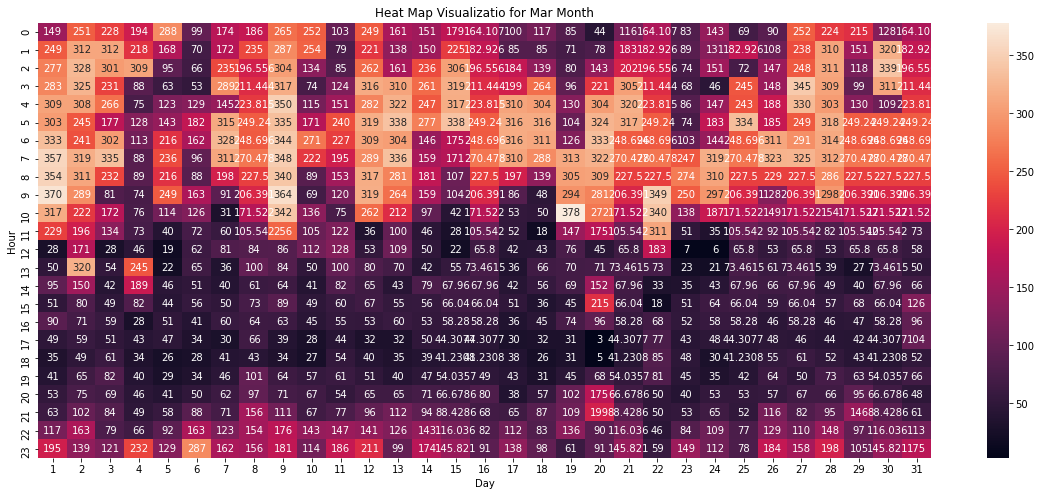

In [31]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=pm_mar,values="pm25",index="Hour",columns="Day",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.title('Heat Map Visualizatio for Mar Month')

Text(0.5, 1.0, 'Heat Map Visualizatio for Apr Month')

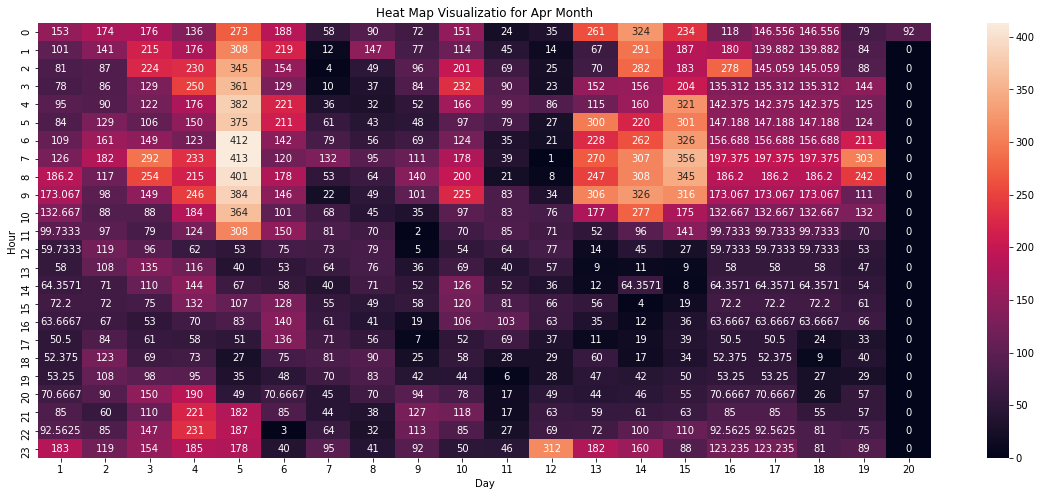

In [32]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=pm_apr,values="pm25",index="Hour",columns="Day",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.title('Heat Map Visualizatio for Apr Month')

### Day/Hour wise boxplots

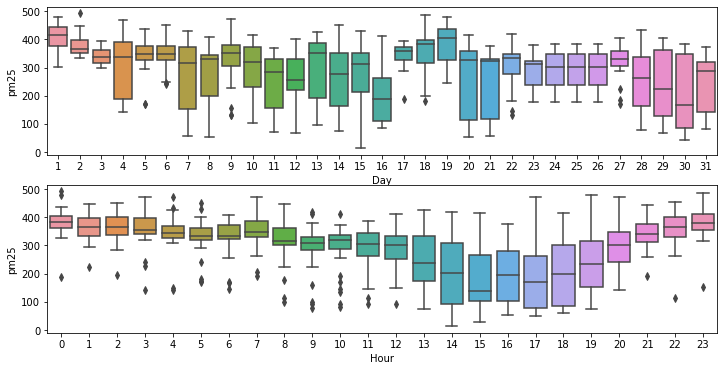

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(211)
sns.boxplot(x="Day",y="pm25",data=pm_jan)
plt.subplot(212)
sns.boxplot(x="Hour",y="pm25",data=pm_jan)


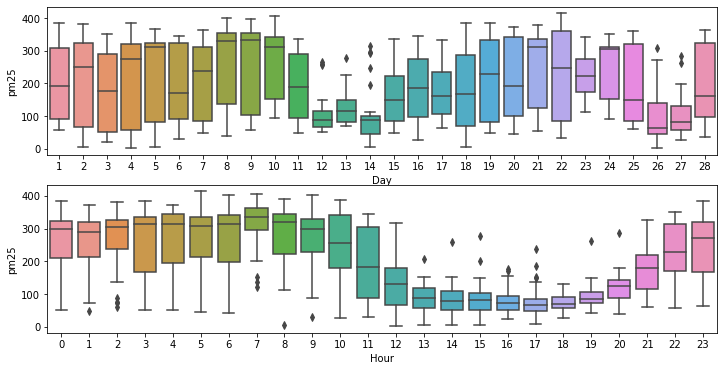

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(211)
sns.boxplot(x="Day",y="pm25",data=pm_feb)
plt.subplot(212)
sns.boxplot(x="Hour",y="pm25",data=pm_feb)


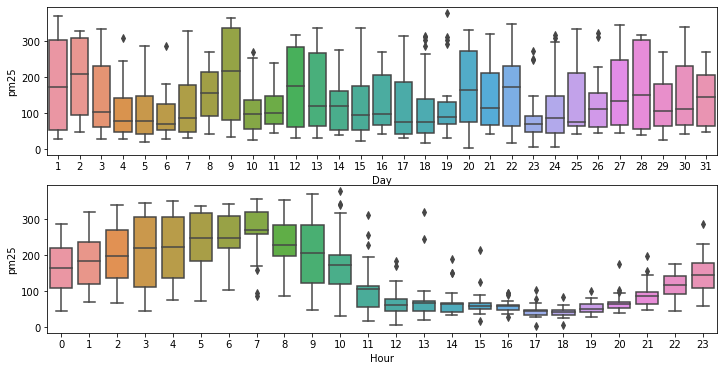

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(211)
sns.boxplot(x="Day",y="pm25",data=pm_mar)
plt.subplot(212)
sns.boxplot(x="Hour",y="pm25",data=pm_mar)


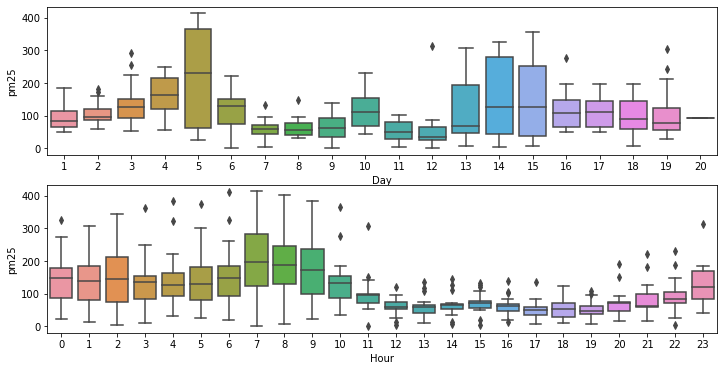

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(211)
sns.boxplot(x="Day",y="pm25",data=pm_apr)
plt.subplot(212)
sns.boxplot(x="Hour",y="pm25",data=pm_apr)

In [37]:
### Concatenating all the months after performing imputation
pm_imputed = pd.concat((pm_jan, pm_feb, pm_mar, pm_apr), axis=0)

In [38]:
pm_imputed.head()

1,index,pm25,Month,Hour,Day
0,2018-01-01 00:00:00,423.0,1,0,1
1,2018-01-01 01:00:00,414.0,1,1,1
2,2018-01-01 02:00:00,417.0,1,2,1
3,2018-01-01 03:00:00,466.0,1,3,1
4,2018-01-01 04:00:00,470.0,1,4,1


In [39]:
### Copying imputed dataset for further model building
pm_df = pm_imputed.copy()

In [40]:
pm_df.head()

1,index,pm25,Month,Hour,Day
0,2018-01-01 00:00:00,423.0,1,0,1
1,2018-01-01 01:00:00,414.0,1,1,1
2,2018-01-01 02:00:00,417.0,1,2,1
3,2018-01-01 03:00:00,466.0,1,3,1
4,2018-01-01 04:00:00,470.0,1,4,1


In [41]:
pm_df['t'] = np.arange(1, 2618)

In [42]:
pm_df['log_pm25'] = np.log(pm_df['pm25'])

In [43]:
pm_df['t_squared'] = np.square(pm_df['t'])

In [44]:
pm_df_Hour = pd.get_dummies(pm_df['Hour'])

In [45]:
pd.set_option('display.max_columns', None)
pm_df_Hour.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
pm_df = pd.concat([pm_df, pm_df_Hour], axis=1)

In [47]:
pm_df.head()

,index,pm25,Month,Hour,Day,t,log_pm25,t_squared,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2018-01-01 00:00:00,423.0,1,0,1,1,6.047372,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-01-01 01:00:00,414.0,1,1,1,2,6.025866,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-01-01 02:00:00,417.0,1,2,1,3,6.033086,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-01-01 03:00:00,466.0,1,3,1,4,6.144186,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-01-01 04:00:00,470.0,1,4,1,5,6.152733,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
pm_df.drop(['Month', 'Day'], axis=1, inplace=True)

In [49]:
pm_df.columns = (['Date', 'pm25', 'Hour', 't', 'log_pm25', 't_squared', 
                  'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven',
                 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen',
                 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen', 'twenty',
                 'twentyone', 'twentytwo', 'twentythree'])

In [50]:
pm_df.reset_index(inplace=True, drop=True)

In [51]:
pm_df.tail()

,Date,pm25,Hour,t,log_pm25,t_squared,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,sixteen,seventeen,eighteen,nineteen,twenty,twentyone,twentytwo,twentythree
2612,2018-04-19 20:00:00,57.0,20,2613,4.043051,6827769,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2613,2018-04-19 21:00:00,57.0,21,2614,4.043051,6832996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2614,2018-04-19 22:00:00,75.0,22,2615,4.317488,6838225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2615,2018-04-19 23:00:00,89.0,23,2616,4.488636,6843456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2616,2018-04-20 00:00:00,92.0,0,2617,4.521789,6848689,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Linear Models

In [52]:
from statsmodels.formula.api import ols

In [53]:
### Dataset Partition Train = 80% and Test = 20%
Train = pm_df.head(2093)
Test = pm_df.tail(524)

In [54]:
Test.tail()

,Date,pm25,Hour,t,log_pm25,t_squared,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,sixteen,seventeen,eighteen,nineteen,twenty,twentyone,twentytwo,twentythree
2612,2018-04-19 20:00:00,57.0,20,2613,4.043051,6827769,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2613,2018-04-19 21:00:00,57.0,21,2614,4.043051,6832996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2614,2018-04-19 22:00:00,75.0,22,2615,4.317488,6838225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2615,2018-04-19 23:00:00,89.0,23,2616,4.488636,6843456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2616,2018-04-20 00:00:00,92.0,0,2617,4.521789,6848689,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
print(Train.shape)
print(Test.shape)

(2093, 30)
(524, 30)


In [56]:
### Linear Model
linear_model = ols('pm25~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['pm25'])-np.array(pred_linear))**2))
rmse_linear

93.73313108695498

In [57]:
#Exponential

Exp = ols('log_pm25~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['pm25'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


92.48789689699913

In [58]:
#Quadratic 

Quad = ols('pm25~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['pm25'])-np.array(pred_Quad))**2))
rmse_Quad

83.52857880863796

In [59]:
#Additive seasonality 

add_sea = ols('pm25~zero+one+two+three+four+five+six+seven+eight+nine+ten+eleven+twelve+thirteen+fourteen+fifteen+sixteen+eighteen+nineteen+twenty+twentyone+twentytwo+twentythree',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['zero', 'one','two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
       'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen','seventeen', 'eighteen', 'nineteen', 'twenty', 'twentyone', 'twentytwo',
       'twentythree']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['pm25'])-np.array(pred_add_sea))**2))
rmse_add_sea

121.82864050233606

In [60]:
#Additive Seasonality Quadratic
add_sea_Quad = ols('pm25~t+t_squared+zero+one+two+three+four+five+six+seven+eight+nine+ten+eleven+twelve+thirteen+fourteen+fifteen+sixteen+eighteen+nineteen+twenty+twentyone+twentytwo+twentythree',data=Train).fit()
pred_add_sea_Quad = pd.Series(add_sea_Quad.predict(Test[['zero', 'one','two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
       'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen','seventeen', 'eighteen', 'nineteen', 'twenty', 'twentyone', 'twentytwo',
       'twentythree', 't', 't_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['pm25'])-np.array(pred_add_sea_Quad))**2))
rmse_add_sea_quad

73.56012690548434

In [61]:
#Multiplicative seasonality 

Mul_sea = ols('log_pm25~zero+one+two+three+four+five+six+seven+eight+nine+ten+eleven+twelve+thirteen+fourteen+fifteen+sixteen+eighteen+nineteen+twenty+twentyone+twentytwo+twentythree',data=Train).fit()
pred_Mul_sea = pd.Series(Mul_sea.predict(Test[['zero', 'one','two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
       'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen','seventeen', 'eighteen', 'nineteen', 'twenty', 'twentyone', 'twentytwo',
       'twentythree']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['pm25'])-np.array(pred_Mul_sea))**2))
rmse_Mult_sea

136.91551896839368

In [62]:
#Multiplicative Additive Seasonality
Mul_Add_sea = ols('log_pm25~t+zero+one+two+three+four+five+six+seven+eight+nine+ten+eleven+twelve+thirteen+fourteen+fifteen+sixteen+eighteen+nineteen+twenty+twentyone+twentytwo+twentythree',data=Train).fit()
pred_Mul_add_sea = pd.Series(Mul_Add_sea.predict(Test[['zero', 'one','two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
       'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen','seventeen', 'eighteen', 'nineteen', 'twenty', 'twentyone', 'twentytwo',
       'twentythree', 't']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['pm25'])-np.array(pred_Mul_add_sea))**2))
rmse_Mult_add_sea

137.5649759256142

In [63]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,73.560127
2,rmse_Quad,83.528579
1,rmse_Exp,92.487897
0,rmse_linear,93.733131
3,rmse_add_sea,121.828641
5,rmse_Mult_sea,136.915519
6,rmse_Mult_add_sea,137.564976


### Smoothing Techniques

In [64]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [65]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [66]:
Train["pm25"] = Train["pm25"].astype('double') 
ses_model = SimpleExpSmoothing(Train["pm25"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
ses_rmse = rmse(pred_ses,Test.pm25)
ses_rmse

<ipython-input-66-82235dab957f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["pm25"] = Train["pm25"].astype('double')
C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


84.2701059400392

In [67]:
# Holt method 
hw_model = Holt(Train["pm25"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
holt_rmse = rmse(pred_hw,Test.pm25)   
holt_rmse

C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-67-7108f99775e5>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["pm25"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


382.1888767318098

In [68]:
hwe_model_add_add = ExponentialSmoothing(Train["pm25"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
holt_winter_rmse = rmse(pred_hwe_add_add,Test.pm25)  
holt_winter_rmse

C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


94.85817836675383

In [69]:
hwe_model_mul_add = ExponentialSmoothing(Train["pm25"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
holt_winter_mult_rmse = rmse(pred_hwe_mul_add,Test.pm25)  
holt_winter_mult_rmse

C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


202.95082592144192

In [70]:
#Compare the results 

data_smoothing = {"MODEL":pd.Series(["Simple Exponential Model","Holt's Model","Holt's Winter(Additive)","Holt's Winter(Multiplicative)"]),"RMSE_Values":pd.Series([ses_rmse, holt_rmse, holt_winter_rmse, holt_winter_mult_rmse])}
smoothing_rmse=pd.DataFrame(data_smoothing)
smoothing_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,Simple Exponential Model,84.270106
2,Holt's Winter(Additive),94.858178
3,Holt's Winter(Multiplicative),202.950826
1,Holt's Model,382.188877


### ARIMA Model Building

In [71]:
pm_imputed.describe()

1,pm25,Month,Hour,Day
count,2617.000000,2617.000000,2617.000000,2617.000000
mean,192.401505,2.349255,11.495606,14.570883
std,123.793151,1.070308,6.925836,8.503622
min,1.000000,1.000000,0.000000,1.000000
25%,76.000000,1.000000,5.000000,7.000000
50%,171.000000,2.000000,11.000000,14.000000
75%,315.000000,3.000000,17.000000,21.000000
max,492.000000,4.000000,23.000000,31.000000


In [72]:
pm_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 0 to 456
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   2617 non-null   datetime64[ns]
 1   pm25    2617 non-null   float64       
 2   Month   2617 non-null   int64         
 3   Hour    2617 non-null   int64         
 4   Day     2617 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 122.7 KB


In [73]:
pm_imputed = pm_imputed.drop(['Month', 'Hour'], axis=1)

In [74]:
pm_imputed = pm_imputed.drop(['Day'], axis=1)

In [75]:
pm_imputed = pm_imputed.set_index('index')

In [76]:
pm_imputed.describe()

1,pm25
count,2617.000000
mean,192.401505
std,123.793151
min,1.000000
25%,76.000000
50%,171.000000
75%,315.000000
max,492.000000


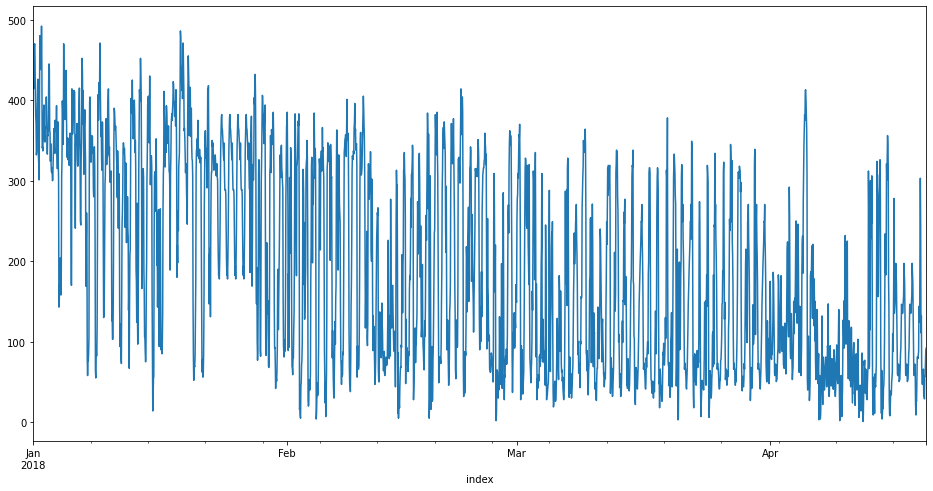

In [77]:
plt.figure(figsize=(16,8))
pm_imputed['pm25'].plot()

In [78]:
pm_imputed.head()

1,pm25
index,
2018-01-01 00:00:00,423.0
2018-01-01 01:00:00,414.0
2018-01-01 02:00:00,417.0
2018-01-01 03:00:00,466.0
2018-01-01 04:00:00,470.0


<Figure size 1440x576 with 0 Axes>

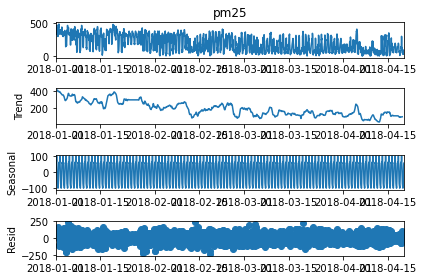

In [79]:
plt.figure(figsize=(20, 8))
seasonal_pm = seasonal_decompose(pm_imputed['pm25'], model= 'additive')
seasonal_pm.plot()
plt.show()

In [80]:
from statsmodels.graphics.tsaplots import acf, pacf
import statsmodels.api as sm

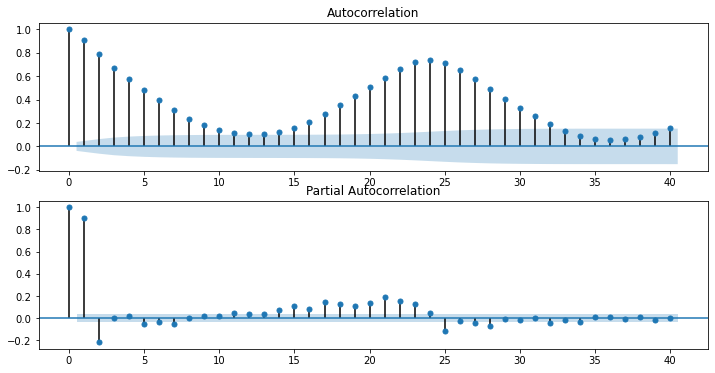

In [81]:
### ACF and PACF Plot on the original data
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(pm_imputed['pm25'], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(pm_imputed['pm25'], lags = 40, ax = ax2)

In [82]:
## Differencing with order 1 to make the data stationery
pm_imputed_diff = pm_imputed.diff(periods=1)
## Removing the first row, as it will reflect as NaN
pm_imputed_diff = pm_imputed_diff[1:]
pm_imputed_diff.head()

1,pm25
index,
2018-01-01 01:00:00,-9.0
2018-01-01 02:00:00,3.0
2018-01-01 03:00:00,49.0
2018-01-01 04:00:00,4.0
2018-01-01 05:00:00,-21.0


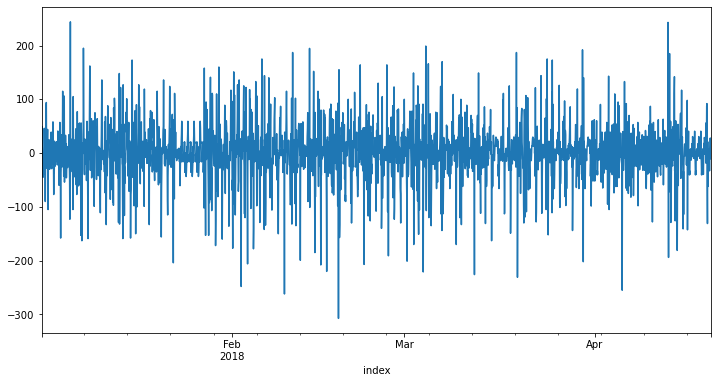

In [83]:
### Plot after differencing
plt.figure(figsize=(12, 6))
pm_imputed_diff['pm25'].plot()

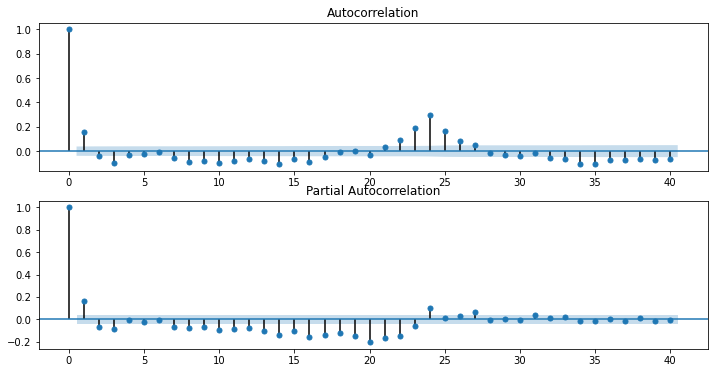

In [84]:
### ACF and PACF Plot after differencing
fig = plt.figure(figsize=(12, 6))
ax1_1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(pm_imputed_diff['pm25'], lags= 40, ax = ax1_1)
ax2_1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(pm_imputed_diff['pm25'], lags= 40, ax = ax2_1)

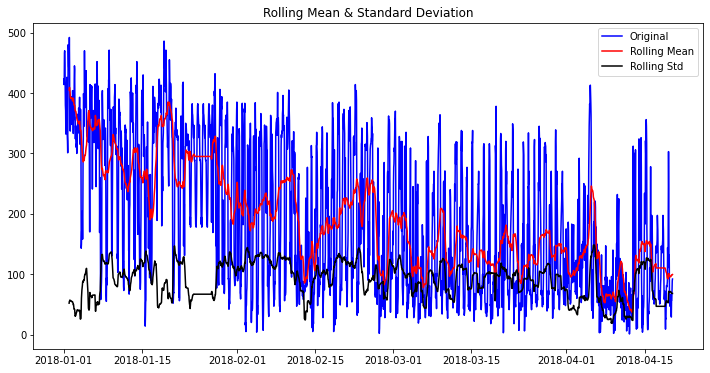

In [85]:
### Plotting Rolling Mean and Standard deviation to identify the stationarity of the data on original Data.

rollmean = pm_imputed.rolling(24).mean()
rollstd = pm_imputed.rolling(24).std()

plt.figure(figsize=(12, 6))
fig = plt.figure(1)

orig = plt.plot(pm_imputed, color = 'blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

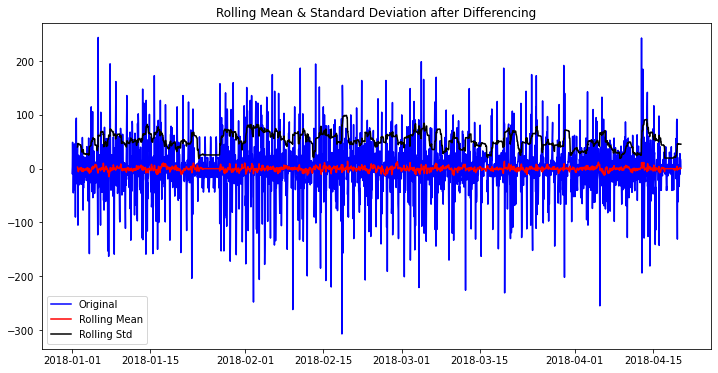

In [86]:
### Plotting Rolling mean and Standard deviation after differencing.

rollmean = pm_imputed_diff.rolling(24).mean()
rollstd = pm_imputed_diff.rolling(24).std()

plt.figure(figsize=(12, 6))
fig = plt.figure(1)

orig = plt.plot(pm_imputed_diff, color = 'blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation after Differencing')
plt.show(block = False)

In [87]:
from statsmodels.tsa.stattools import adfuller

In [88]:
### Defining adfuller function to check the stationarity of the data.

def adfuller_test(pm25):
    result = adfuller(pm25, autolag='AIC')
    labels = ['ADF Test Statistic:', 'P-Value', '#Lags Used', 'No. of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('\033[94m'+'\033[1m' + 'Strong evidence against null hypothesis(Ho), reject null hypothesis. Data is stationary')
    else:
        print('\033[91m'+'\033[1m' + 'Weak evidence against null hypothesis, accept null hypothesis. Data is non stationary')

In [89]:
adfuller_test(pm_imputed_diff['pm25'])

ADF Test Statistic: : -15.458920116022599
P-Value : 2.7220291550048165e-28
#Lags Used : 26
No. of Observations Used : 2589
Strong evidence against null hypothesis(Ho), reject null hypothesis. Data is stationary


In [90]:
# Separate out a validation dataset(90% - Train Data and 10% - Test Data)
split_point = len(pm_imputed) - 260
dataset, validation = pm_imputed[0:split_point], pm_imputed[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset_pm.csv', header=False)
validation.to_csv('validation_pm.csv', header=False)

Dataset 2357, Validation 260


In [91]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
data = pd.read_csv('dataset_pm.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = data.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [92]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('Expected=%.3f, >Predicted=%.3f' % (yhat, obs))

Expected=314.000, >Predicted=382.000
Expected=382.000, >Predicted=362.000
Expected=362.000, >Predicted=346.000
Expected=346.000, >Predicted=334.000
Expected=334.000, >Predicted=332.000
Expected=332.000, >Predicted=385.000
Expected=385.000, >Predicted=337.000
Expected=337.000, >Predicted=306.000
Expected=306.000, >Predicted=217.000
Expected=217.000, >Predicted=139.000
Expected=139.000, >Predicted=49.000
Expected=49.000, >Predicted=59.000
Expected=59.000, >Predicted=80.000
Expected=80.000, >Predicted=74.000
Expected=74.000, >Predicted=81.519
Expected=81.519, >Predicted=76.667
Expected=76.667, >Predicted=73.000
Expected=73.000, >Predicted=95.154
Expected=95.154, >Predicted=152.000
Expected=152.000, >Predicted=189.000
Expected=189.000, >Predicted=289.000
Expected=289.000, >Predicted=314.000
Expected=314.000, >Predicted=358.000
Expected=358.000, >Predicted=366.000
Expected=366.000, >Predicted=365.000
Expected=365.000, >Predicted=340.000
Expected=340.000, >Predicted=373.000
Expected=373.000,

In [93]:
# report performance
rmse_base_model = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse_base_model)

RMSE: 51.114


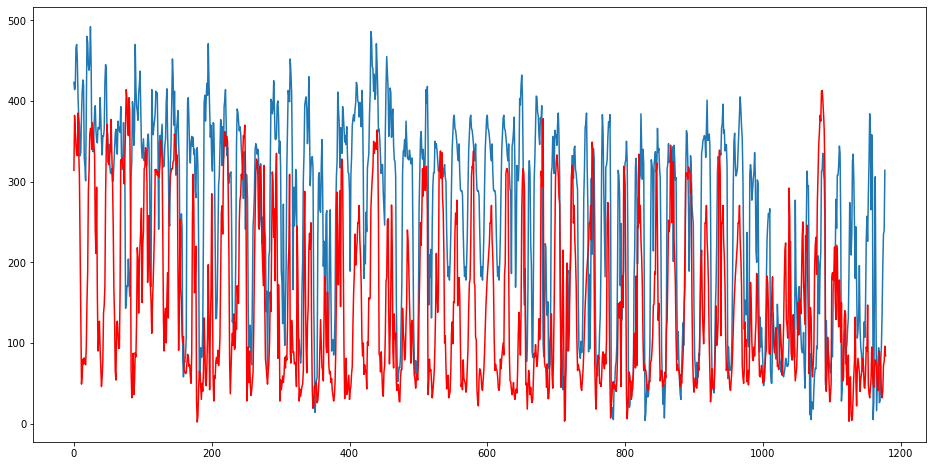

In [94]:
plt.figure(figsize=(16,8))
plt.plot(train)
plt.plot(predictions, color = 'red')
plt.show()

In [95]:
#grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    #prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
    #model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [96]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [97]:
    # load dataset
    train = read_csv('dataset_pm.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
    # evaluate parameters
    #p_values = range(0, 3)
    #d_values = range(0, 2)
    #q_values = range(0, 11)
    #warnings.filterwarnings("ignore")
    #evaluate_models(train.values, p_values, d_values, q_values)

### ARIMA model building on train data

In [98]:
### Importing libraries for ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [99]:
# load data
train_data = read_csv('dataset_pm.csv', header=None, index_col=0, parse_dates=True)
print(train_data.head()) 
# prepare data
X = train_data.values
X = X.astype('float32')

                         1
0                         
2018-01-01 00:00:00  423.0
2018-01-01 01:00:00  414.0
2018-01-01 02:00:00  417.0
2018-01-01 03:00:00  466.0
2018-01-01 04:00:00  470.0


C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

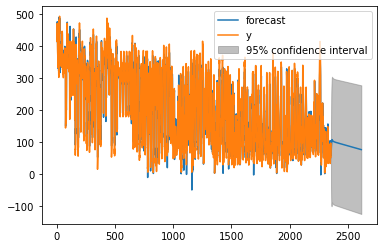

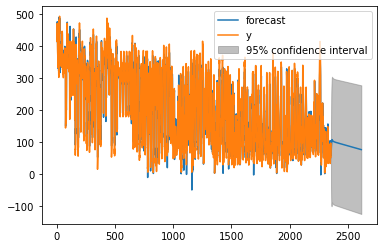

In [100]:
model_arima = ARIMA(X, order=(1,1,10))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps = 260)[0]
model_arima_fit.plot_predict(1, 2617)

### Validation on Test data

In [101]:
validation_data=pd.read_csv('validation_pm.csv',header=None, index_col=0, parse_dates= True)
rmse = sqrt(mean_squared_error(validation_data[1], forecast_arima))
rmse

83.45530451590898

### Final ARIMA Model with Combining Train and Test Data

In [102]:
part_final = pm_imputed
X_part = part_final.values
X_part = X_part.astype('float32')

In [103]:
model_part_final = ARIMA(X_part, order=(1,1,10))
model_part_final_fit = model_part_final.fit()

C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

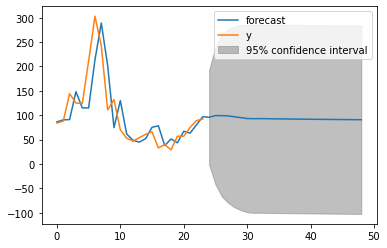

In [104]:
forecast_part_final = model_part_final_fit.forecast(steps=24)[0]
model_part_final_fit.plot_predict(2593, 2641)
plt.show()

In [105]:
forecast_part_final

array([95.83974753, 99.29357736, 99.20678163, 98.68585919, 96.79971776,
       95.0817186 , 93.23635715, 92.90850006, 93.12572334, 92.92024902,
       92.72819943, 92.5479398 , 92.37803442, 92.21722239, 92.06439639,
       91.91858392, 91.77893092, 91.64468732, 91.5151944 , 91.38987365,
       91.268217  , 91.14977826, 91.03416558, 90.92103481])

In [106]:
forecast_part_final_df = pd.DataFrame(forecast_part_final)

In [107]:
forecast_part_final_df['Date'] = pd.date_range(start='20/04/2018 01:00:00', periods=len(forecast_part_final_df), freq='H')

In [108]:
forecast_part_final_df = forecast_part_final_df[ ['Date'] + [ col for col in forecast_part_final_df.columns if col != 'Date' ] ]

In [109]:
forecast_part_final_df.columns = ['Date', 'pm25']

In [110]:
forecast_part_final_df

,Date,pm25
0,2018-04-20 01:00:00,95.839748
1,2018-04-20 02:00:00,99.293577
2,2018-04-20 03:00:00,99.206782
3,2018-04-20 04:00:00,98.685859
4,2018-04-20 05:00:00,96.799718
5,2018-04-20 06:00:00,95.081719
6,2018-04-20 07:00:00,93.236357
7,2018-04-20 08:00:00,92.908500
8,2018-04-20 09:00:00,93.125723
9,2018-04-20 10:00:00,92.920249


### SARIMA Model

In [111]:
### Importing libraries for SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [112]:
pm_sarima = pm_imputed.copy()

In [ ]:
#pm_sarima.reset_index(inplace=True, drop=True)

In [113]:
pm_sarima.head()

1,pm25
index,
2018-01-01 00:00:00,423.0
2018-01-01 01:00:00,414.0
2018-01-01 02:00:00,417.0
2018-01-01 03:00:00,466.0
2018-01-01 04:00:00,470.0


In [114]:
train = pm_sarima.head(2357)
test = pm_sarima.tail(260)

### SARIMA Model building on Train Data

In [115]:
model_sarima = SARIMAX(train, order=(1,1,10), seasonal_order=(1,1,1,24))

C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [116]:
model_sarima_fit = model_sarima.fit()

C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [117]:
residuals = model_sarima_fit.resid

Text(0.5, 1.0, 'SARIMA Residual Plot')

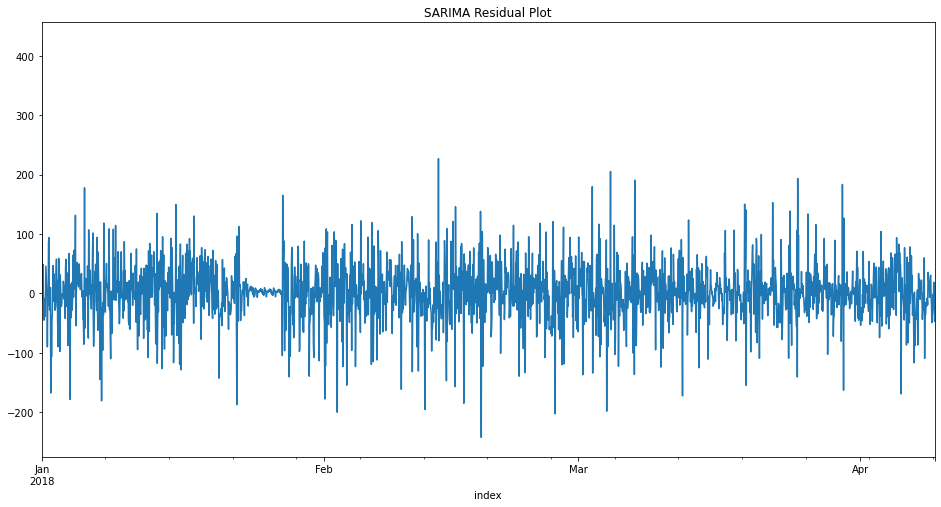

In [118]:
plt.figure(figsize=(16,8))
residuals.plot()
plt.title('SARIMA Residual Plot')

In [119]:
### SARIMA Model Summary
print(model_sarima_fit.summary())

                                       SARIMAX Results                                       
Dep. Variable:                                  pm25   No. Observations:                 2357
Model:             SARIMAX(1, 1, 10)x(1, 1, [1], 24)   Log Likelihood              -12256.884
Date:                               Mon, 01 Mar 2021   AIC                          24541.768
Time:                                       12:04:56   BIC                          24622.331
Sample:                                   01-01-2018   HQIC                         24571.120
                                        - 04-09-2018                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9357      0.063    -14.961      0.000      -1.058      -0.813
ma.L1      

### Validation on Test data

In [124]:
pred_sarima = model_sarima_fit.predict(start = len((train)+1), end=(len(pm_imputed)-1))

In [125]:
print(len(train)+1)
print(len(pm_imputed)-1)

2358
2616


In [126]:
rmse_sarima = np.sqrt(mean_squared_error(test.values, pred_sarima))

In [127]:
rmse_sarima

73.31055374221151

### Final SARIMA Model with Combining Train and Test Data

In [128]:
final_model_sarima = SARIMAX(pm_imputed, order=(1,1,10), seasonal_order=(1,1,1,24), enforce_invertibility=False, enforce_stationarity=False)

C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [129]:
final_model_sarima_fit = final_model_sarima.fit()

C:\Users\rayad\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Predictions for entire dataset

In [130]:
yhat = final_model_sarima_fit.predict()

In [131]:
yhat

2018-01-01 00:00:00      0.000000
2018-01-01 01:00:00    290.973693
2018-01-01 02:00:00    467.045900
2018-01-01 03:00:00    395.681606
2018-01-01 04:00:00    446.128107
                          ...    
2018-04-19 20:00:00     40.642875
2018-04-19 21:00:00     81.136382
2018-04-19 22:00:00     72.913939
2018-04-19 23:00:00    104.538631
2018-04-20 00:00:00    108.969245
Freq: H, Name: predicted_mean, Length: 2617, dtype: float64

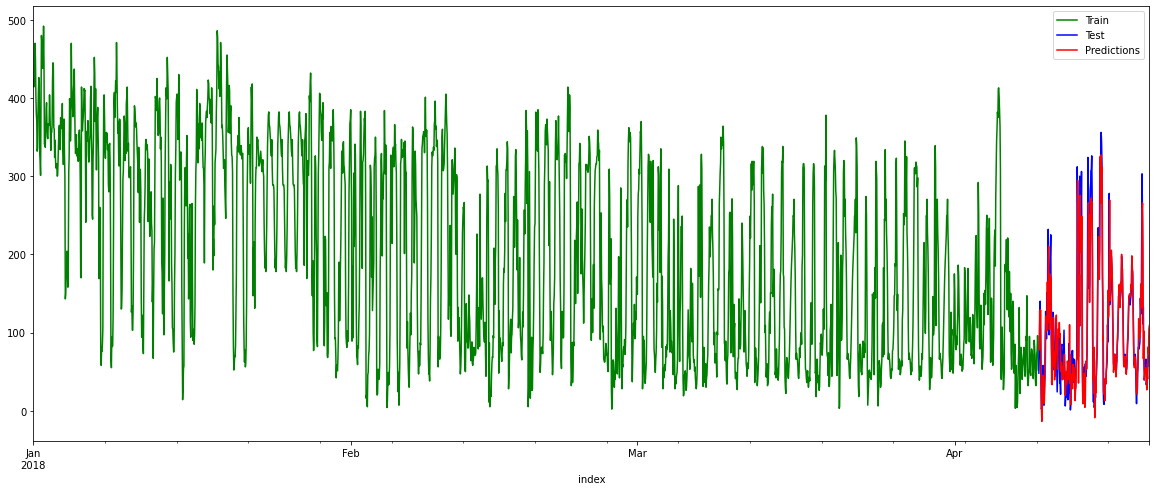

In [132]:
plt.figure(figsize=(20,8))
train['pm25'].plot(legend = True, color = 'green', label = 'Train')
test['pm25'].plot(legend = True, color = 'blue', label = 'Test')
yhat[2358:].plot(legend = True, color = 'red', label = 'Predictions')

### Predictions for next 24 Hrs

In [133]:
forecast_sarima = final_model_sarima_fit.forecast(24)

### Creating Dataframe for Predictions of next 24 Hours

In [142]:
forecast_sarima_df = pd.DataFrame(forecast_sarima)

In [143]:
forecast_sarima_df['Date'] = pd.date_range(start='20/04/2018 01:00:00', periods=len(forecast_sarima_df), freq='H')

In [144]:
forecast_sarima_df = forecast_sarima_df[ ['Date'] + [ col for col in forecast_sarima_df.columns if col != 'Date' ] ]

In [145]:
forecast_sarima_df.columns = ['date', 'pm25']


In [146]:
forecast_sarima_df.set_index(['date'], inplace=True)

In [147]:
forecast_sarima_df = round(forecast_sarima_df['pm25'])

In [148]:
forecast_sarima_df

date
2018-04-20 01:00:00    102.0
2018-04-20 02:00:00    118.0
2018-04-20 03:00:00    134.0
2018-04-20 04:00:00    139.0
2018-04-20 05:00:00    155.0
2018-04-20 06:00:00    172.0
2018-04-20 07:00:00    221.0
2018-04-20 08:00:00    190.0
2018-04-20 09:00:00    161.0
2018-04-20 10:00:00    129.0
2018-04-20 11:00:00     80.0
2018-04-20 12:00:00     41.0
2018-04-20 13:00:00     39.0
2018-04-20 14:00:00     41.0
2018-04-20 15:00:00     49.0
2018-04-20 16:00:00     42.0
2018-04-20 17:00:00     27.0
2018-04-20 18:00:00     26.0
2018-04-20 19:00:00     32.0
2018-04-20 20:00:00     49.0
2018-04-20 21:00:00     67.0
2018-04-20 22:00:00     82.0
2018-04-20 23:00:00    110.0
2018-04-21 00:00:00    126.0
Name: pm25, dtype: float64